In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yahoofinancials import YahooFinancials

In [14]:
def download_csv_data(ticker, start_date, end_date, freq, path):
    
    yahoo_financials = YahooFinancials(ticker)

    df = yahoo_financials.get_historical_price_data(start_date, end_date, freq)
    df = pd.DataFrame(df[ticker]['prices']).drop(['date'], axis=1) \
            .rename(columns={'formatted_date':'date'}) \
            .loc[:, ['date','open','high','low','close','volume']] \
            .set_index('date')
    df.index = pd.to_datetime(df.index)
    df['dividend'] = 0
    df['split'] = 1

    # save data to csv for later ingestion
    df.to_csv(path, header=True, index=True)

    # plot the time series
    df.close.plot(title='{} prices --- {}:{}'.format(ticker, start_date, end_date));

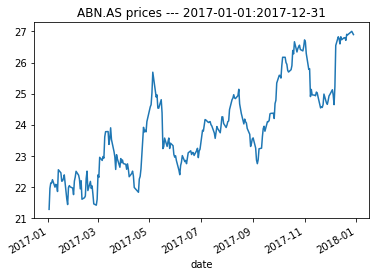

In [24]:
download_csv_data(ticker='ABN.AS', 
                  start_date='2017-01-01', 
                  end_date='2017-12-31', 
                  freq='daily', 
                  path='./Data/ABN.csv')

In [26]:
!pip install zipline

  Using cached zipline-1.4.1.tar.gz (5.4 MB)
  Using cached Logbook-1.5.3.tar.gz (85 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached python-interface-1.6.0.tar.gz (15 kB)
  Using cached multipledispatch-0.6.0-py3-none-any.whl (11 kB)
  Using cached toolz-0.11.1-py3-none-any.whl (55 kB)
  Using cached pandas-0.22.0.tar.gz (11.3 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/panyuehsheng/opt/anaconda3/envs/quant/bin/python /Users/panyuehsheng/opt/anaconda3/envs/quant/lib/python3.8/site-packages/pip install --ignore-installed --no-user --prefix /private/var/folders/2v/j2qlsn8j1f3d64rggjv5z2400000gn/T/pip-build-env-h3isl5m_/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools Cython 'numpy==1.9.3; python_version=='"'"'3.5'"'"'' 'numpy==1.12.1; python_version=='"'"'3.6'"'"'' 'numpy==1.13.1; python_version>='"'"'3.7'"'"''
       cwd

In [25]:
!zipline bundles

zsh:1: command not found: zipline
